# Brick Model Tutorial- Meter Data to Building Data

This tutorial uses data from the academic buildings of the Hong Kong University of Science and Technology (HKUST) as an example. Through this tutorial, you will learn:
1. How to use the Brick Schema to find the required meter inputs.
2. How to preprocess meter data.
3. How to convert meter data into building energy usage data.
4. Basic data visualization techniques.

## Step 1: Environment Setup

In [1]:
from rdflib import Graph
import pandas as pd
import os
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt

## Step 2: Explore HKUST Brick Model
Here is a simple application of the `Query_Example` from this repository. Please download the `HKUST_Meter_Metadata.ttl` file from https://datadryad.org/stash/dataset/doi:10.5061/dryad.k3j9kd5h6.

In [2]:
# Load the Brick Schema model into the graph
graph = Graph()
file_path = 'Data/HKUST_Meter_Metadata.ttl'
graph.parse(file_path, format='turtle')

# Query to retrieve all buildings
query_all_building = f"""
    SELECT ?building
    WHERE {{
        ?building a brick:Building .
    }}
"""

# Execute the query and display the results
buildings = graph.query(query_all_building)
print("All buildings in HKUST:")
for row in buildings:
    # Extract and print the building name from the URI
    print(str(row['building']).split('#')[1])


All buildings in HKUST:
Academic_Building
Boat_House
Cheng_Yu_Tung_Building
Coastal_Marine_Lab
IASR_Plant
IAS_from_IASR_
Indoor_Swim_Pool
Jockey_Club_Hall
LSK_Business_Buildings
NFF2_Lab_NFF2_Lab_Elect
Sea_Water_Pump_House
Seafront_Indoor_Sport_Centre
Seafront_Sport_Centre_Sport_Field
Shaw_Auditorium
Staff_Quarters_01_SSQ_T1_2___PL
Staff_Quarters_02_SSQ_T3_4
Staff_Quarters_03_SSQ_T5_7
Staff_Quarters_04_SSQ_T8_14
Staff_Quarters_05_SSQ_T15_19
Staff_Quarters_06_SSQ_P_S
Staff_Quarters_07_SSQ_APT1_48
Staff_Quarters_07_SSQ_APT1_49
Student_Hall_01_UG1
Student_Hall_02_UG2
Student_Hall_03_UG3
Student_Hall_04_UG4
Student_Hall_05_UG6
Student_Hall_06_UG7
Student_Hall_07_UG8_9
Student_Hall_09_PG2
Student_Hall_10_GGT
Tower_A_D_Buildings
Wind_Wave_Tunnel_Building
HKUST_Campus_Zone_1_8
Outdoor_Pool


In [3]:
# Define the SPARQL query to select all zones associated with academic building
query_all_zone = f"""
    SELECT ?zone
    WHERE {{
        ?zone a brick:Zone .  # Find all entities of type 'brick:Zone'
        FILTER EXISTS {{ bldg:Academic_Building brick:hasPart ?zone }}
    }}
"""

# Execute the SPARQL query on the graph
result = graph.query(query_all_zone)

# Iterate through the query results and print the zone names
for i in result:
    print(i['zone'].split("#")[-1])

Annex_Lift_29_30_Elect
Boiler_Water_Plant_LG1_BSU_Elect
Building_Service_Unit_LG5_Elect
Carpark_Elect
Carpark_MCC_from_SB1_8A_Elect
Carpark_TX3_MCC_From_SB_1_1A_Elect
Enterprise_Centre_Elect
Enterprise_Centre_Enterprise_Centre___L3_Elect
Enterprise_Centre_Lab_L3_Elect
G_F_Canteen_Lift_13_15_Elect
Indoor_Carpark_Elect
Indoor_Carpark_Switch_Board_2_Elect
Information_Technology_Services_Centre_Data_Centre_RM2113_Elect
Information_Technology_Services_Centre_Data_Centre_RM2124_Elect
LG1_G_F_Canteen_Lift_13_15_Elect
LG1_Sport_Hall_Elect
LG5_Sub_Main_Switch_Room_Elect
LG7_Canteen_Elect
Library_Canteen_Building_Elect
Library_Elect
Phase_1_Academic_Building_Elect
Phase_2_Academic_Building_Elect
Plumbing_Drainage_Switch_Board_Elect
Zone_A1_A2_Lift_3_4_Elect
Zone_A1_Lift_4_Elect
Zone_A2_Lift_3_Elect
Zone_A3_A4_Lift_1_2_Elect
Zone_A5_A6_Lift_17_18_Elect
Zone_A5_Lift_17_18_Elect
Zone_A7_Lift_19_Elect
Zone_D_Lift_25_26_Elect
Zone_E_Lift_27_28_Elect
Zone_H1_Lift_23_Elect
Zone_H1_Lift_24_Elect
Zone_H2

## Step 3: Extract All Electric Meter Data In Academic Building

In [4]:
query_ac_meter = f"""
    SELECT ?meter
    WHERE {{
        bldg:Academic_Building brick:hasPart ?zone .
        ?zone a brick:Zone .
        ?zone brick:hasPart ?meter .
        ?meter a brick:Electrical_Meter .
    }}
"""
result = graph.query(query_ac_meter)
Meter_list = []
for i in result:
    print(i['meter'].split("#")[-1])
    Meter_list.append(i['meter'].split("#")[-1])
print("Total number of meters in the academic building:", len(Meter_list))

Meter_M0289
Meter_M0290
Meter_M0291
Meter_M0293
Meter_M0295
Meter_M0296
Meter_M0529
Meter_M0530
Meter_D0695
Meter_D0696
Meter_M0292
Meter_M0294
Meter_M0126
Meter_M0127
Meter_M0128
Meter_M0129
Meter_M0130
Meter_M0121
Meter_M0122
Meter_M0123
Meter_M0124
Meter_M0125
Meter_M0112
Meter_D0705
Meter_M0113
Meter_M0114
Meter_M0115
Meter_M0116
Meter_M0117
Meter_M0118
Meter_M0119
Meter_M0120
Meter_D0808
Meter_D0809
Meter_D0810
Meter_D0811
Meter_D0812
Meter_D0813
Meter_D0814
Meter_D0815
Meter_D0816
Meter_D0818
Meter_D0819
Meter_D0820
Meter_D0821
Meter_D0823
Meter_D0825
Meter_D0826
Meter_D0817
Meter_D0822
Meter_D0824
Meter_M0035
Meter_M0036
Meter_M0037
Meter_M0038
Meter_M0039
Meter_M0040
Meter_M0041
Meter_M0042
Meter_D0408
Meter_M0043
Meter_M0044
Meter_M0045
Meter_M0046
Meter_M0047
Meter_M0048
Meter_M0049
Meter_M0050
Meter_M0051
Meter_M0052
Meter_M0503
Meter_M0528
Meter_D0601
Meter_D0602
Meter_D0603
Meter_D0604
Meter_D0876
Meter_D0877
Meter_D0878
Meter_M0564
Meter_M0565
Meter_M0566
Meter_M0567
Mete

In [5]:
# Prepare a list to store the results
results_list = []

# Double check, query whether the meter belongs to the academic building
for meter in Meter_list:
    query_meter_belong = f"""
        SELECT ?building ?zone
        WHERE {{
            bldg:{meter} a brick:Electrical_Meter .
            ?zone brick:hasPart bldg:{meter} .
            ?zone a brick:Zone .
            ?building brick:hasPart ?zone .
            ?building a brick:Building .
        }}
    """
    result = graph.query(query_meter_belong)
    for i in result:
        # Append the results to the list
        results_list.append({
            'Building': i['building'].split("#")[-1], 
            'Zone': i['zone'].split("#")[-1], 
            'Meter': meter,
            'Meter_Datafile_Name': "GUI_NO.{}.xlsx".format(meter.split("_")[-1])
        })

# Convert the results list to a DataFrame
df = pd.DataFrame(results_list)

# Display the DataFrame
df

,Building,Zone,Meter,Meter_Datafile_Name
0,Academic_Building,Annex_Lift_29_30_Elect,Meter_M0289,GUI_NO.M0289.xlsx
1,Academic_Building,Annex_Lift_29_30_Elect,Meter_M0290,GUI_NO.M0290.xlsx
2,Academic_Building,Annex_Lift_29_30_Elect,Meter_M0291,GUI_NO.M0291.xlsx
3,Academic_Building,Annex_Lift_29_30_Elect,Meter_M0293,GUI_NO.M0293.xlsx
4,Academic_Building,Annex_Lift_29_30_Elect,Meter_M0295,GUI_NO.M0295.xlsx
...,...,...,...,...
666,NFF2_Lab_NFF2_Lab_Elect,Animal_Care_Facility_7_F_Elect,Meter_H0054,GUI_NO.H0054.xlsx
667,Academic_Building,Animal_Care_Facility_7_F_Elect,Meter_H0055,GUI_NO.H0055.xlsx
668,NFF2_Lab_NFF2_Lab_Elect,Animal_Care_Facility_7_F_Elect,Meter_H0055,GUI_NO.H0055.xlsx
669,Academic_Building,Animal_Care_Facility_7_F_Elect,Meter_H0061,GUI_NO.H0061.xlsx


From the results, it can be seen that all meters belong to the Academic Building. Some meters, however, belong to both the Animal Care Facility 7 F Eelectrical space and the NFF2 Lab, specifically the NFF2_Lab_Elect space.


In [6]:
# Remove duplicate meters.
Pure_Academic_Building_df = df[df['Building'] == 'Academic_Building']
Pure_Academic_Building_df

,Building,Zone,Meter,Meter_Datafile_Name
0,Academic_Building,Annex_Lift_29_30_Elect,Meter_M0289,GUI_NO.M0289.xlsx
1,Academic_Building,Annex_Lift_29_30_Elect,Meter_M0290,GUI_NO.M0290.xlsx
2,Academic_Building,Annex_Lift_29_30_Elect,Meter_M0291,GUI_NO.M0291.xlsx
3,Academic_Building,Annex_Lift_29_30_Elect,Meter_M0293,GUI_NO.M0293.xlsx
4,Academic_Building,Annex_Lift_29_30_Elect,Meter_M0295,GUI_NO.M0295.xlsx
...,...,...,...,...
661,Academic_Building,Animal_Care_Facility_7_F_Elect,Meter_H0052,GUI_NO.H0052.xlsx
663,Academic_Building,Animal_Care_Facility_7_F_Elect,Meter_H0053,GUI_NO.H0053.xlsx
665,Academic_Building,Animal_Care_Facility_7_F_Elect,Meter_H0054,GUI_NO.H0054.xlsx
667,Academic_Building,Animal_Care_Facility_7_F_Elect,Meter_H0055,GUI_NO.H0055.xlsx


## Step 4: Data Preprocessing

The raw time series data used in this step can be downloaded from https://datadryad.org/stash/dataset/doi:10.5061/dryad.k3j9kd5h6.

In [7]:
# Create a directory for preprocessed data if it doesn't exist
output_dir = "preprocessed_data"
os.makedirs(output_dir, exist_ok=True)

# Function to process each file
def process_and_save_file(file_name):
    try:
        # Load the Excel file
        data = pd.read_excel(file_name)
        
        # Ensure the DataFrame has a datetime index
        if 'time' not in data.columns:
            raise ValueError(f"'time' column is missing in {file_name}")
        data['time'] = pd.to_datetime(data['time'])
        data.set_index('time', inplace=True)
        
        # Resample the data to hourly intervals
        data_hourly = data.resample('h').mean()
        
        # Apply linear interpolation only to the 'number' column
        if 'number' in data_hourly.columns:
            data_hourly['number'] = data_hourly['number'].interpolate(method='linear')
        
        # Save the preprocessed data
        output_file_name = os.path.basename(file_name).replace('.xlsx', '.csv')
        output_file = os.path.join(output_dir, output_file_name)

        data_hourly.to_csv(output_file)
    
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

# Iterate over the DataFrame with a progress bar
for _, row in tqdm(Pure_Academic_Building_df.iterrows(), total=len(Pure_Academic_Building_df), desc="Processing files"):
    file_name = "Data/Time-series data/" + row['Meter_Datafile_Name']
    process_and_save_file(file_name)

Processing files:   7%|▋         | 42/606 [00:22<03:24,  2.75it/s]

Error processing Data/Time-series data/GUI_NO.D0819.xlsx: [Errno 2] No such file or directory: 'Data/Time-series data/GUI_NO.D0819.xlsx'


Processing files:  27%|██▋       | 166/606 [02:02<03:23,  2.16it/s]

Error processing Data/Time-series data/GUI_NO.D0616.xlsx: [Errno 2] No such file or directory: 'Data/Time-series data/GUI_NO.D0616.xlsx'
Error processing Data/Time-series data/GUI_NO.D0617.xlsx: [Errno 2] No such file or directory: 'Data/Time-series data/GUI_NO.D0617.xlsx'
Error processing Data/Time-series data/GUI_NO.D0618.xlsx: [Errno 2] No such file or directory: 'Data/Time-series data/GUI_NO.D0618.xlsx'


Processing files:  89%|████████▉ | 541/606 [07:40<00:40,  1.60it/s]

Error processing Data/Time-series data/GUI_NO.H0001.xlsx: [Errno 2] No such file or directory: 'Data/Time-series data/GUI_NO.H0001.xlsx'
Error processing Data/Time-series data/GUI_NO.H0002.xlsx: [Errno 2] No such file or directory: 'Data/Time-series data/GUI_NO.H0002.xlsx'
Error processing Data/Time-series data/GUI_NO.H0003.xlsx: [Errno 2] No such file or directory: 'Data/Time-series data/GUI_NO.H0003.xlsx'


Processing files: 100%|██████████| 606/606 [08:32<00:00,  1.18it/s]


From the current results, it can be observed that a small portion of the meters lack data. The reason for this is discussed in the Technical Validation section of the paper. For details, please refer to: https://www.nature.com/articles/s41597-024-04106-1.

## Step 5: Convert Meter Data to Building Energy Consumption Data

In [8]:
# Ignore warnings
warnings.filterwarnings("ignore")

# Directory containing the preprocessed data files
input_dir = "preprocessed_data"
output_file = "Building_Consumption_Data.xlsx"

# Initialize an empty DataFrame to hold all data
combined_data = pd.DataFrame()

# Iterate through all CSV files in the directory
for file in tqdm(os.listdir(input_dir), desc="Combining files"):
    if file.endswith('.csv'):
        file_path = os.path.join(input_dir, file)
        
        # Load the file
        data = pd.read_csv(file_path)
        
        # Ensure it has the necessary 'time' and 'number' columns
        if 'time' in data.columns and 'number' in data.columns:
            data['time'] = pd.to_datetime(data['time'])  # Ensure time is datetime
            data.set_index('time', inplace=True)
            
            # Add the 'number' column to the combined DataFrame
            combined_data[file] = data['number']

# Sum all columns to create the 'Building_Consumption_data' column
combined_data['Building_Consumption_data'] = combined_data.sum(axis=1)

# Reset the index to include 'time' as a column
combined_data.reset_index(inplace=True)

# Save the result to an Excel file
combined_data[['time', 'Building_Consumption_data']].to_excel(output_file, index=False)

print(f"Building consumption data saved to {output_file}")

Combining files: 100%|██████████| 599/599 [00:07<00:00, 80.12it/s] 


Building consumption data saved to Building_Consumption_Data.xlsx


## Step 7: Data Visualization

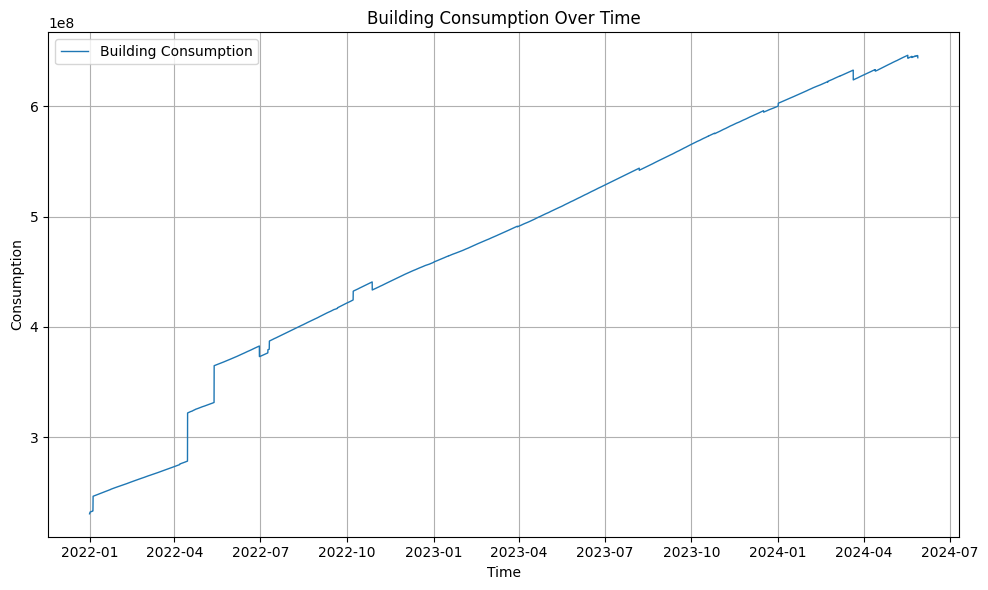

In [9]:
# Load the data from the Excel file
file_path = "Building_Consumption_Data.xlsx"
data = pd.read_excel(file_path)

# Ensure the 'time' column is a datetime type
data['time'] = pd.to_datetime(data['time'])

# Plot 1: Line chart of Building_Consumption_data
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['Building_Consumption_data'], label='Building Consumption', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.title('Building Consumption Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The results indicate that the data exhibits some fluctuations. These could be attributed to two possible reasons: the addition of new meter data or the restart of certain meters.

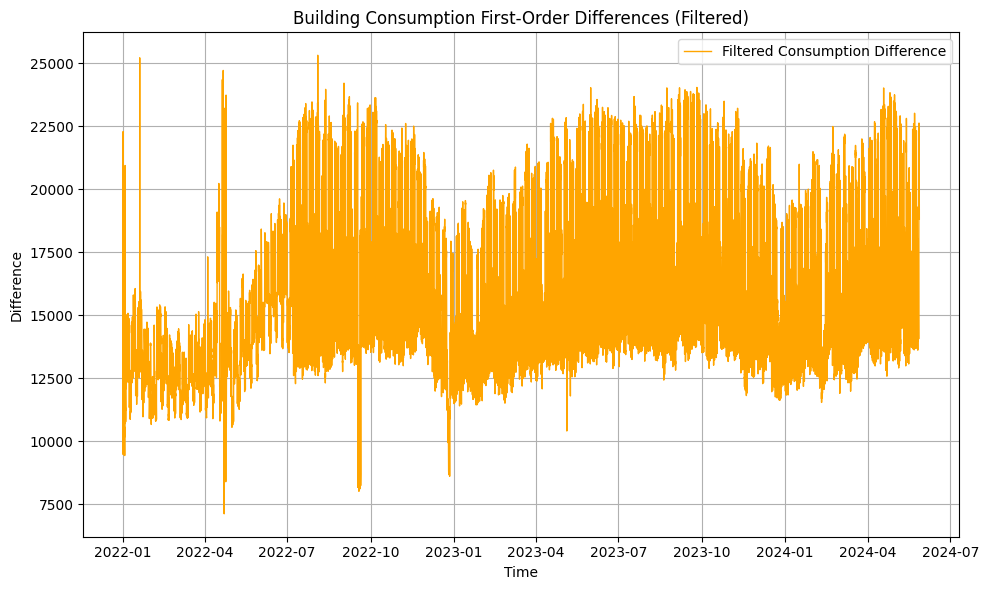

In [10]:
# Calculate the first-order differences
data['Consumption_Difference'] = data['Building_Consumption_data'].diff()

# Remove outliers using the IQR method
Q1 = data['Consumption_Difference'].quantile(0.25)
Q3 = data['Consumption_Difference'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
filtered_data = data[(data['Consumption_Difference'] >= lower_bound) & (data['Consumption_Difference'] <= upper_bound)]

# Plot the filtered first-order differences
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['time'], filtered_data['Consumption_Difference'], label='Filtered Consumption Difference', linewidth=1, color='orange')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.title('Building Consumption First-Order Differences (Filtered)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

To calculate power, we performed differencing on the consumption data and removed outliers using the IQR method. From the results in the second chart, it is evident that the data quality has significantly improved.

## Conclusion

This tutorial demonstrates how to convert meter data into building energy consumption data using the Brick Model. The tutorial also covers data preprocessing techniques, including handling missing values using linear interpolation and removing outliers with the IQR method. Visualization techniques are also discussed. The results show that the data quality has improved significantly after preprocessing. This tutorial can be adapted to other buildings within this dataset.